In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json

with open('learning_curve.json', 'r') as fp:
    data = json.load(fp)
    
smalls = 4
revisions = 6

# Results for imdb

0.005128399999999988
0.00456169365038907
0.004478633658829434
0.0034400830745782898


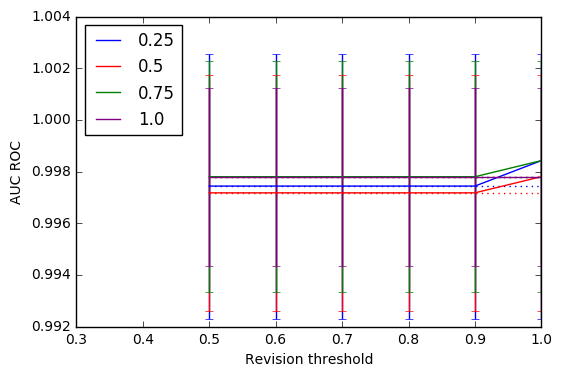

0.010000000000000009
0.007977832137241306
0.008017867647323706
0.0044645061373011965


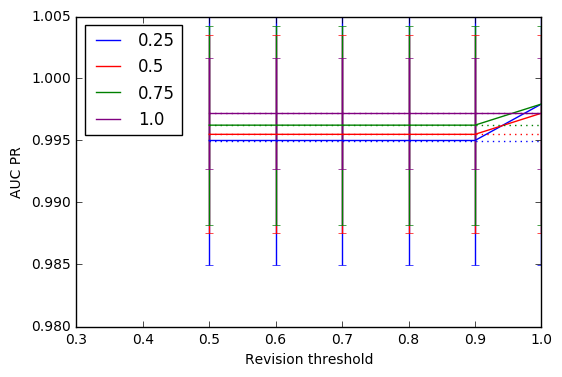

0.01067804409477691
0.01255199769797621
0.010733279472742708
0.011952029477875294


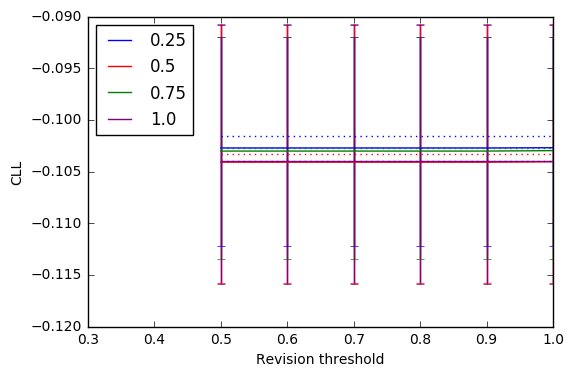

0.0
0.0
0.0
0.0


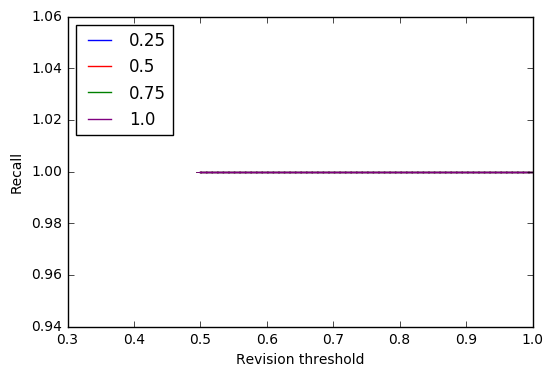

0.00585149652738509
0.00585149652738509
0.00585149652738509
0.00585149652738509


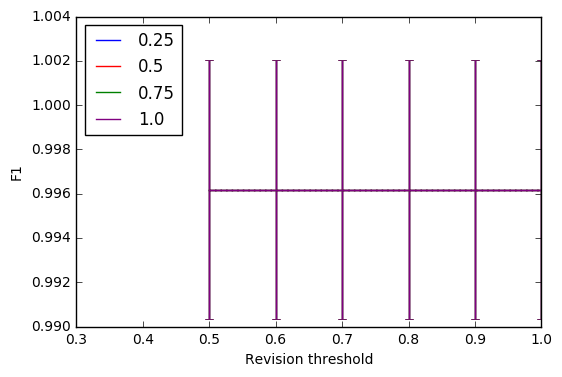

0.011555538900890786
0.011555538900890786
0.011555538900890786
0.011555538900890786


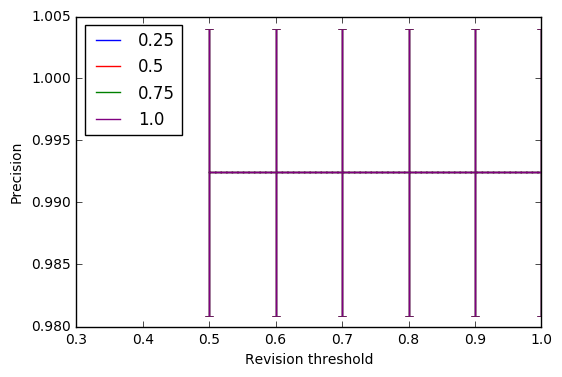

1.0187227493287858
1.5800205979670015
1.593765883058111
0.7351215953840562


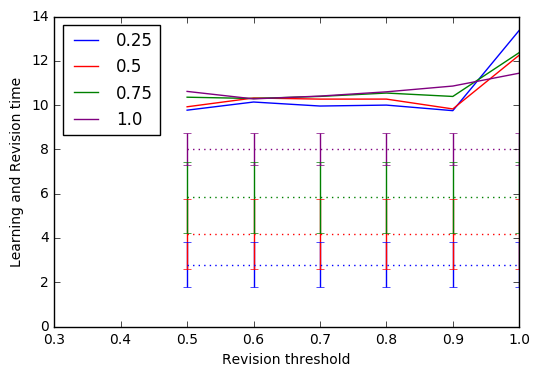

0.02697202254188587
0.07517739021807023
0.022420749318432666
0.2750599207445534


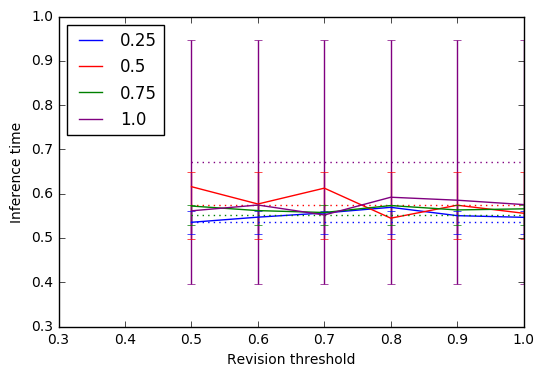

# Results for uwcse

0.0330235465363731
0.05597480797189035
0.03396837413006397
0.03258433631501491


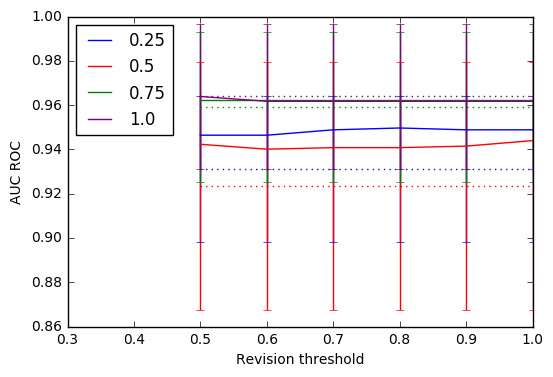

0.05939720406685822
0.10345988347296746
0.04186264139349069
0.04406572241731663


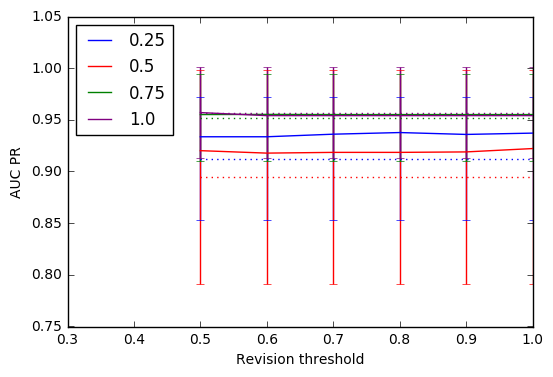

0.0693877236462618
0.0659108126653738
0.051732305253970656
0.05047496053490285


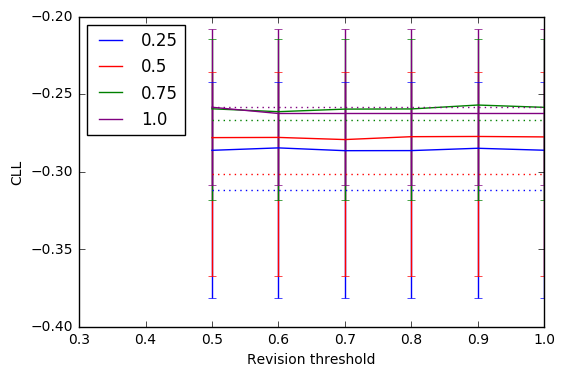

0.13904960991491488
0.059458754059936385
0.08565623999972216
0.06349183363622445


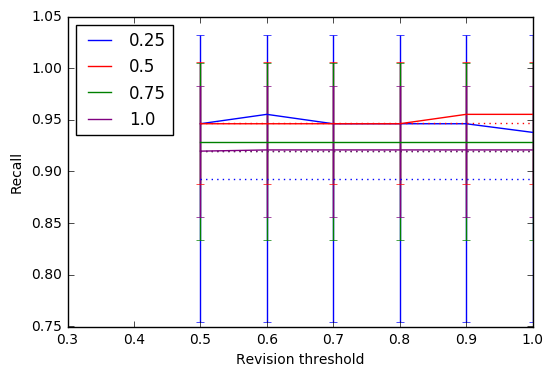

0.0665146150301571
0.03497840039567276
0.042704793500964254
0.0387140316118071


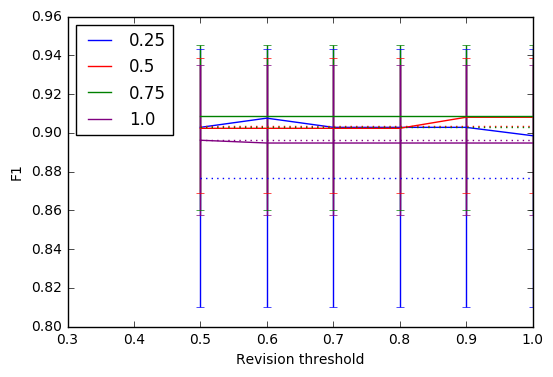

0.05498608384864302
0.054905616301522374
0.05467610777698061
0.051915335902216794


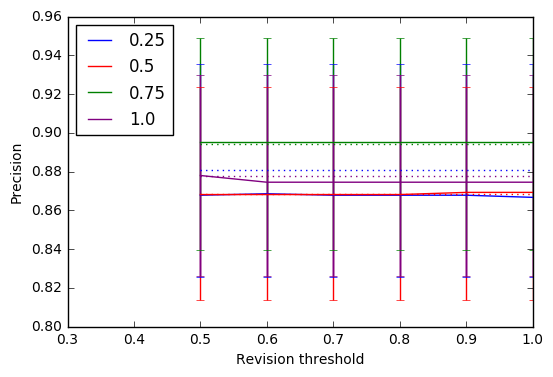

3.0670253357284154
9.701449995232672
6.8502789906689205
12.497770255529584


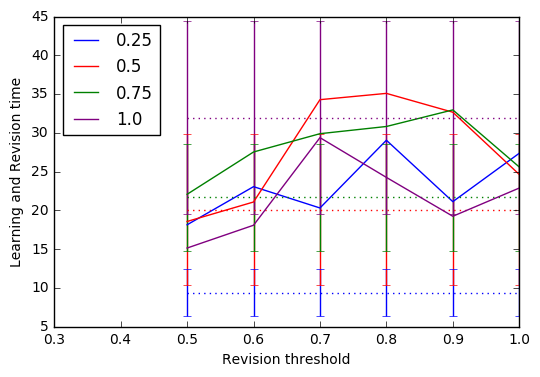

0.0992199576698156
0.3424804227981506
0.11487210279262758
0.18807628771325746


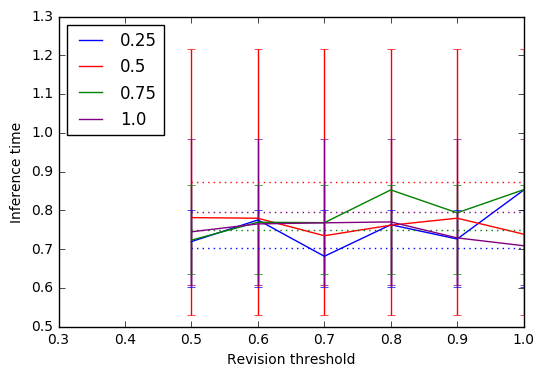

# Results for nell

0.0
0.0
0.0
0.0


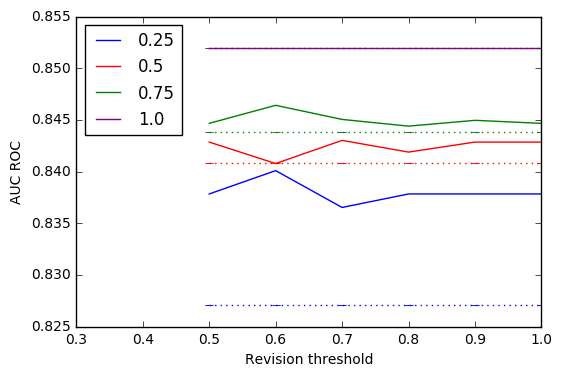

0.0
0.0
0.0
0.0


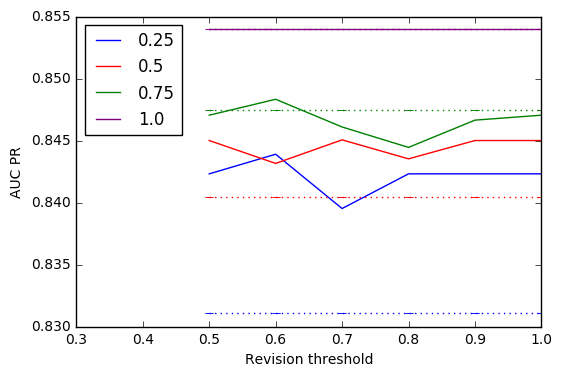

0.0
0.0
0.0
0.0


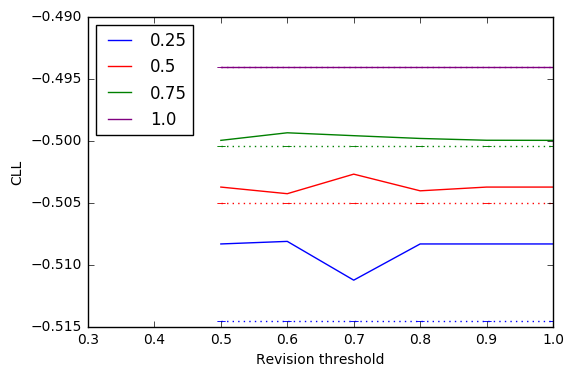

0.0
0.0
0.0
0.0


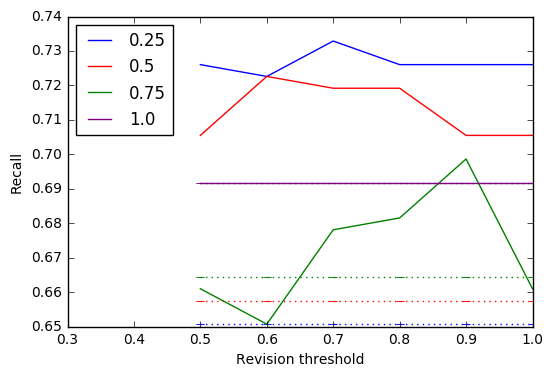

0.0
0.0
0.0
0.0


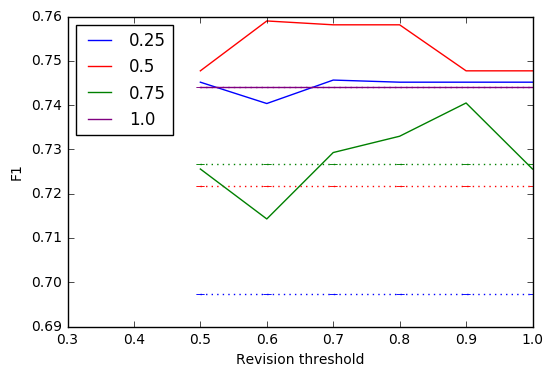

0.0
0.0
0.0
0.0


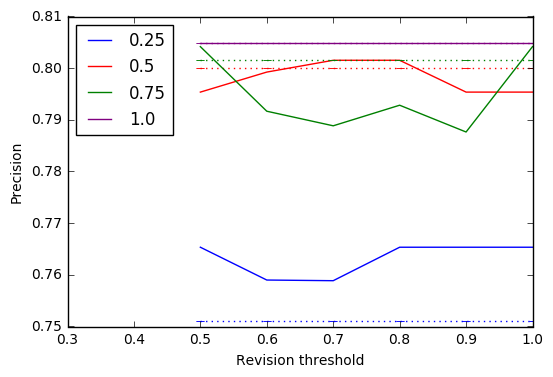

0.0
0.0
0.0
0.0


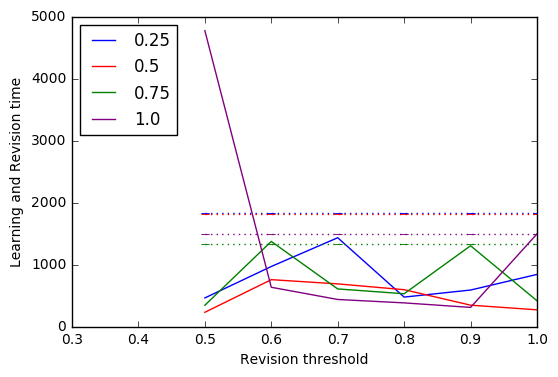

0.0
0.0
0.0
0.0


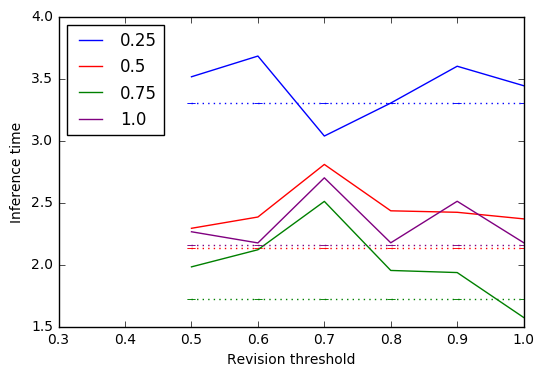

In [22]:
for dataset in ['imdb', 'uwcse', 'nell']:
    display(Markdown('# Results for ' + dataset))
    for metric in ['AUC ROC', 'AUC PR', 'CLL', 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
        colors = {'0.25': 'blue', '0.5': 'red', '0.75': 'green', '1.0': 'purple'}
        for small_train_size in np.linspace(0.25, 1.0, num=smalls):
            x = []
            y = []
            if metric == 'Precision':
                base = np.array([result[metric][0] for result in data[dataset]['small'][str(small_train_size)]])
            elif metric == 'Learning and Revision time':
                base = np.array([result['Learning time'] for result in data[dataset]['small'][str(small_train_size)]])
            else:
                base = np.array([result[metric] for result in data[dataset]['small'][str(small_train_size)]])
            #print(base)
            mean = base.mean()
            mean = revisions * [mean]
            error = base.std()
            
            error = revisions * [error]
            print(error)
            for revision_threshold in np.linspace(0.5, 1.0, num=revisions):
                x.append(revision_threshold)
                if metric == 'Precision':
                    v = [result[metric][0] for result in data[dataset]['revision'][str(small_train_size)][str(revision_threshold)]]
                elif metric == 'Learning and Revision time':
                    v = [result['Revision time'] for result in data[dataset]['revision'][str(small_train_size)][str(revision_threshold)]]
                else:
                    v = [result[metric] for result in data[dataset]['revision'][str(small_train_size)][str(revision_threshold)]]
                v = np.array(v)
                y.append(v.mean())
            plt.plot(x, y, label=str(small_train_size), color=colors[str(small_train_size)])
            #plt.plot(x, mean, linestyle=':', color=colors[str(small_train_size)])
            plt.errorbar(x, mean, yerr=error, linestyle=':', color=colors[str(small_train_size)])
        plt.xlim(0.3,1.0)
        plt.xlabel('Revision threshold')
        plt.ylabel(metric)
        plt.legend(loc='upper left')
        plt.show()